In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [43]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.
last_row = session.query(Measurement).order_by(Measurement.date.desc()).first()
last_row.__dict__['date']

'2017-08-23'

<Axes: xlabel='Date', ylabel='Inches'>

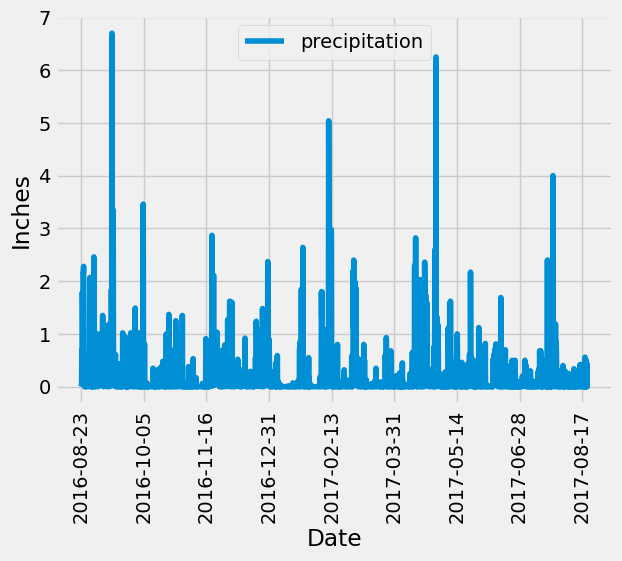

In [167]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date= dt.datetime.strptime(last_row.__dict__['date'],'%Y-%m-%d')
# Calculate the date one year from the last date in data set.
end_date=dt.date(most_recent_date.year -1, most_recent_date.month, most_recent_date.day)

# Perform a query to retrieve the data and precipitation scores
data = [Measurement.date,Measurement.prcp]
filtered_data = session.query(*data).filter(Measurement.date >= end_date).all()
#filtered_data_dt=[]
#for data in filtered_data:
    #filtered_data_dt.append([dt.datetime.strptime(data[0],'%Y-%m-%d'),data[1]])
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df=pd.DataFrame(filtered_data, columns=["date","precipitation"])
prcp_df=prcp_df.dropna(how='any')
# Sort the dataframe by date
prcp_df=prcp_df.sort_values(["date"], ascending=True)
prcp_df.head()
# Use Pandas Plotting with Matplotlib to plot the data

#x_ticks=['2016-08-23','2016-11-09','2016-01-28','2017-04-18','2017-07-10']
#x_ticks_dt=[]
#for x in x_ticks:
#    x_ticks_dt.append(dt.datetime.strptime(x,'%Y-%m-%d'))

#prcp_df.plot(kind="bar",x='date',y='precipitation',use_index=True,grid=True,ylabel="Inches")
prcp_df=prcp_df.set_index('date')
prcp_df.head()
prcp_df.plot(xlabel="Date",ylabel="Inches",rot=90)

In [114]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

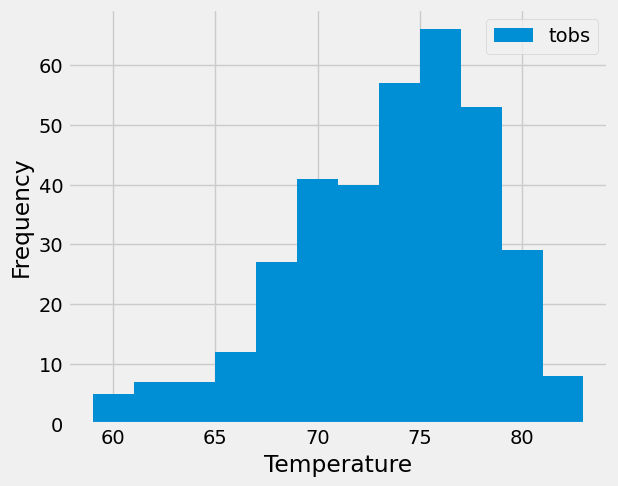

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()